In [1]:
import pandas as pd
import json
from glob import glob
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', 255)

In [3]:
subjects = []
for media in ['France 3', 'France 2', 'TF1']:
    for year in ['2021']:
        for month in ['10', '11']:
            month_path = f'../data-news-json/media={media}/year={year}/month={month}'
            day_files = glob(f'{month_path}/day=*/*.json')
            for day_file in day_files:
                for line in open(day_file):
                    subject = json.loads(line)
                    subject['media'] = media.lower().replace(' ', '')
                    subjects.append(subject)

In [4]:
data = pd.DataFrame(subjects)

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.head()

,title,description,date,order,presenter,authors,editor,editorDeputy,url,urlTvNews,containsWordGlobalWarming,media
0,"Présidentielle 2022 : Éric Zemmour et Marine Le Pen en déplacement dans le sud-est, à quelques kilomètres d’écart","Toujours pas officiellement candidat, Éric Zemmour était à Nîmes (Gard), tandis que Marine Le Pen se déplaçait à Cavaillon (Vaucluse), vendredi 15 octobre. Une centaine de kilomètres entre les deux, alors que la présidente du RN est sous pression.La c...",2021-10-15 00:00:00+00:00,8,Catherine Matausch,"[C. Motte, V. Lerouge, M. Benito, J. Paul, P. Gueny, France 3 Nîmes]",Philippe Denis,"[Anne-Charlotte Hinet, Charles-Henri Carlier]",https://www.francetvinfo.fr/politique/eric-zemmour/presidentielle-2022-eric-zemmour-et-marine-le-pen-en-deplacement-dans-le-sud-est-a-quelques-kilometres-decart_4809111.html,https://www.francetvinfo.fr/replay-jt/france-3/19-20/jt-de-19-20-du-vendredi-15-octobre-2021_4783823.html,False,france3
1,Manifestation du 17 octobre 1961 à Paris : un massacre quasiment oublié de notre histoire,"Le 17 octobre 1961, des Algériens qui manifestaient pacifiquement contre la guerre d'Algérie et les brimades qu'ils subissent ont été tués par la police française, à Paris. Un massacre encouragé par Maurice Papon, à l'époque préfet de police de Paris....",2021-10-15 00:00:00+00:00,9,Catherine Matausch,"[H. Huet, S. Guibout, M. Laban, M. Tafnil, S. Korwin]",Philippe Denis,"[Anne-Charlotte Hinet, Charles-Henri Carlier]",https://www.francetvinfo.fr/culture/patrimoine/histoire/manifestation-du-17-octobre-1961-a-paris-un-massacre-quasiment-oublie-de-notre-histoire_4809129.html,https://www.francetvinfo.fr/replay-jt/france-3/19-20/jt-de-19-20-du-vendredi-15-octobre-2021_4783823.html,False,france3
2,Consommation : les ménages modestes et ceux plus aisés ne sont pas égaux devant l'inflation,"L'inflation s'élève à 2,2% sur un an, d'après l'Insee. Mais des disparités existent entre les Français, qui ne consomment pas tous de la même façon.Selon les chiffres de l'Insee, l'inflation s'élève à 2,2% sur un an. ""L'inflation, ce n'est qu'une moye...",2021-10-15 00:00:00+00:00,7,Catherine Matausch,[Julien Bigard],Philippe Denis,"[Anne-Charlotte Hinet, Charles-Henri Carlier]",https://www.francetvinfo.fr/economie/energie/consommation-les-menages-modestes-et-ceux-plus-aises-ne-sont-pas-egaux-devant-l-inflation_4809133.html,https://www.francetvinfo.fr/replay-jt/france-3/19-20/jt-de-19-20-du-vendredi-15-octobre-2021_4783823.html,False,france3
3,Italie : le pass sanitaire rendu obligatoire au travail,"L’Italie a décidé de rendre obligatoire le pass sanitaire pour aller travailler, que ce soit dans le secteur privé ou public. Le journaliste Alban Mikoczy, en direct de Rome vendredi 15 octobre, fait le point sur cette initiative inédite.En Italie, le...",2021-10-15 00:00:00+00:00,5,Catherine Matausch,[Alban Mikoczy],Philippe Denis,"[Anne-Charlotte Hinet, Charles-Henri Carlier]",https://www.francetvinfo.fr/sante/maladie/coronavirus/pass-sanitaire/italie-le-pass-sanitaire-rendu-obligatoire-au-travail_4809047.html,https://www.francetvinfo.fr/replay-jt/france-3/19-20/jt-de-19-20-du-vendredi-15-octobre-2021_4783823.html,False,france3
4,"Rodéo urbain : à Clermont-Ferrand, un accident tue une octogénaire","C'est un drame qui provoque de nombreuses réactions à Clermont-Ferrand (Puy-de-Dôme). Une femme de 81 ans a été fauchée par un motard en roue-arrière. Elle est décédée.L'accident s'est produit sur un passage piéton, le jeudi 14 octobre aux alentours d...",2021-10-15 00:00:00+00:00,6,Catherine Matausch,"[T.Cuny, L.Breuil, A-C.Huet, L.Rodari, B.Bervas]",Philippe Denis,"[Anne-Charlotte Hinet, Charles-Henri Carlier]",https://www.francetvinfo.fr/france/auvergne-rhone-alpes/puy-de-dome/clermont-ferrand/rodeo-urbain-a-clermont-ferrand-un-accident-tue-une-octogenaire_4809121.html,https://www.francetvinfo.fr/replay-jt/france-3/19-20/jt-de-19-20-du-vendredi-15-octobre-2021_4783823.html,False,france3


In [7]:
cop26 = data[(data['date'] >= '2021-10-30') & (data['date'] < '2021-11-13')].copy()

In [21]:
cop26['cop26'] = [('cop26' in t.lower() or 'cop 26' in t) 
                  or ('cop26' in d.lower() or 'cop 26' in d) for t,d in zip(cop26.title, cop26.description)]

In [22]:
cop26['climat'] = cop26['cop26'] + cop26['containsWordGlobalWarming']

/home/david/projects/data-env/lib/python3.10/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [23]:
cop26.groupby('media').climat.value_counts()

media    climat
france2  False     178
         True       19
france3  False     259
         True       23
tf1      False     186
         True       10
Name: climat, dtype: int64

In [28]:
cop26[cop26.climat & (cop26.media == 'tf1')][['media', 'date', 'title', 'cop26', 'description']].sort_values(['media', 'date'])

,media,date,title,cop26,description
2246,tf1,2021-10-30 00:00:00+00:00,Enquête sur l'inquiétante montée des eaux en Camargue,True,"Les dirigeants de la planète se retrouvent ce dimanche à Glasgow en Écosse pour la COP26. Le temps presse ; les signes de dérèglement climatique ne cessent de s'accroître, y compris en France. La Camargue pourrait par exemple se retrouver sous les eau..."
2358,tf1,2021-10-31 00:00:00+00:00,La fête d'Halloween en Angleterre,False,"Vous vous préparez peut-être à célébrer Halloween. Figurez-vous qu'en Angleterre, on joue à se faire peur pour de vrai. Ici, il n'y a pas de place aux faux pas. Nous sommes sur le chemin le plus dangereux d'Angleterre. La marée vient de descendre. Qu..."
2496,tf1,2021-11-01 00:00:00+00:00,COP26 : un sommet crucial,True,"La COP26 s’est ouverte à Glasgow ce lundi. Son ambition : prendre soin de notre Terre, garantir à nos enfants un monde vivable. Presque tous les dirigeants de la planète tentent de trouver un terrain d’entente en l’absence de la Chine, plus gros pollu..."
2512,tf1,2021-11-04 00:00:00+00:00,À Madagascar : ils sauvent les lémuriens,False,"Nos forêts tempérées ou celles plus lointaines sont précieuses car elles jouent un rôle essentiel dans la lutte contre le réchauffement climatique. À Madagascar, des initiatives du bon sens et l’amour de la nature peuvent changer beaucoup de choses. ..."
2685,tf1,2021-11-06 00:00:00+00:00,COP26 : Angers l'exemple à suivre ?,True,"Angers est aujourd'hui la ville la plus verte de l'Hexagone. Les habitants plébiscitent les efforts financiers que cela implique. Planter, encore et encore. À deux pas du centre-ville, celui dont certains surnomment le central parc d'Angers va encore..."
2781,tf1,2021-11-08 00:00:00+00:00,Eclairage public : ces villes qui économisent,True,"Les dirigeants de la planète sont toujours réunis à Glasgow en Écosse dans le cadre de la COP26 pour tenter de trouver des solutions au réchauffement climatique. En France, des villes ont déjà commencé à économiser l’éclairage public. Illustration. C..."
2792,tf1,2021-11-08 00:00:00+00:00,"Mangues en Sicile, lavande au Cachemire... à la découverte de cultures surprenantes",False,"Nous irons à la rencontre d'agriculteurs du monde entier qui s'adaptent au changement climatique. Ils cultivent de la lavande dans les montagnes du Cachemire et des mangues tropicales en Sicile. Débutons par une devinette, où sommes-nous ? Dans un ch..."
2793,tf1,2021-11-08 00:00:00+00:00,Méthane : comment réduire les émissions de ce gaz qui réchauffe la planète ?,True,"DÉFI ÉCOLOGIQUE - Émis majoritairement par le bétail et les énergies fossiles, c’est l’un des gaz à effet de serre qui réchauffent le plus rapidement l’atmosphère. Plusieurs solutions existent pour suivre l'engagement de la COP26 de réduire de 30% ses..."
2737,tf1,2021-11-09 00:00:00+00:00,Nucléaire : Emmanuel Macron annonce la relance de la construction de nouveaux réacteurs,True,"On a aussi beaucoup appris ce mardi soir sur la politique énergétique de la France. Emmanuel Macron, dans son intervention, a annoncé la relance de la construction de réacteurs nucléaires. Combien vont être construits ? À quelle échéance et à quel pri..."
2716,tf1,2021-11-12 00:00:00+00:00,VIDÉO - Ce couple de Français détient le record du monde de plongée sous la banquise,False,"EN APNÉE - Emmanuelle et Ghislain Bardout explorent l'océan Arctique depuis 15 ans. Détenteurs de record, ils parcourent, le monde en famille afin, notamment, de sensibiliser au réchauffement climatique. Comme une force magnétique, le Pôle Nord les a..."


In [25]:
cop26['day'] = [x.strftime('%Y-%m-%d') for x in cop26.date]

In [26]:
cop26[cop26.climat][['media', 'day', 'title']].sort_values(['media', 'day']).to_excel('data/cop26.xlsx')

Text(0.5, 1.0, 'Part des sujets climat et COP26')

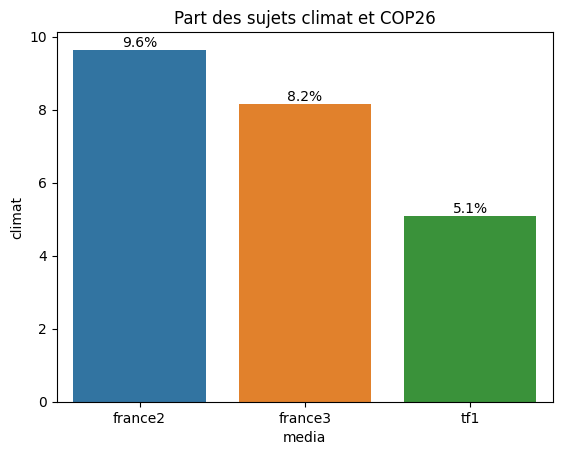

In [27]:
ax = sns.barplot(x='media', y='climat', 
                 data=(cop26.groupby('media').climat.mean() * 100).reset_index())
ax.bar_label(ax.containers[0], fmt="%.1f%%")
ax.set_title('Part des sujets climat et COP26')
